In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
# %matploblib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 10,6

In [2]:
dataset = pd.read_csv("C:\\Users\\garci\\medical_time_series .csv")
indexedTimeseries = dataset.set_index(['Day'])

In [3]:
indexedTimeseries.head(5)

,Revenue
Day,
1,0.000000
2,-0.292356
3,-0.327772
4,-0.339987
5,-0.124888


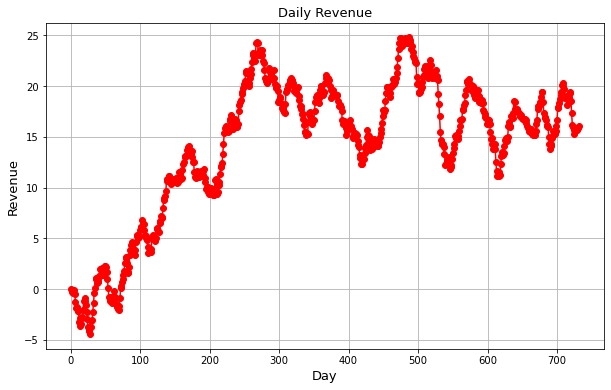

In [4]:
# medical data plot revenue
plt.plot(dataset['Day'], dataset['Revenue'], color='red', marker='o')
plt.title('Daily Revenue', fontsize=13)
plt.xlabel('Day', fontsize=13)
plt.ylabel('Revenue', fontsize=13)
plt.grid(True)
plt.show()

In [5]:
# search for NaNs
indexedTimeseries.isna().sum().sum()

0

In [6]:
# count of Zeros in the revenue column
count = (indexedTimeseries['Revenue'] == 0).sum()
print('Count of zeros in Column Revenue: ', count)

Count of zeros in Column Revenue:  1


In [7]:
# drop row with zero in the revenue column
indexedTimeseries = indexedTimeseries.drop(1)

In [8]:
indexedTimeseries.head()

,Revenue
Day,
2,-0.292356
3,-0.327772
4,-0.339987
5,-0.124888
6,-0.491590


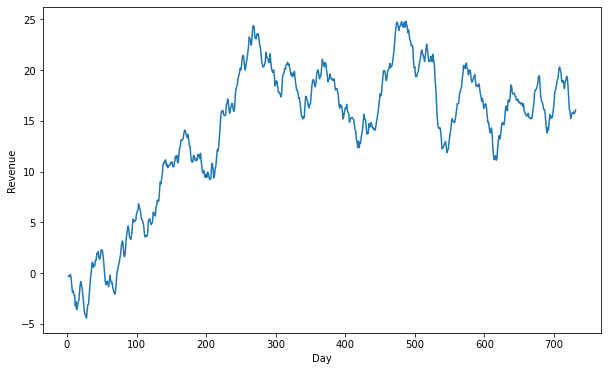

In [9]:
plt.xlabel('Day')
plt.ylabel('Revenue')
plt.plot(indexedTimeseries)

In [10]:
# Create the Rolling average/mean and Rolling Standard Deviation
rolmean = indexedTimeseries.rolling(window=10).mean() 
rolstd = indexedTimeseries.rolling(window=10).std() 
print (rolmean, rolstd)

       Revenue
Day           
2          NaN
3          NaN
4          NaN
5          NaN
6          NaN
..         ...
727  16.910967
728  16.560334
729  16.197404
730  15.928426
731  15.801992

[730 rows x 1 columns]       Revenue
Day          
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
..        ...
727  1.603240
728  1.371896
729  0.979199
730  0.546288
731  0.251864

[730 rows x 1 columns]


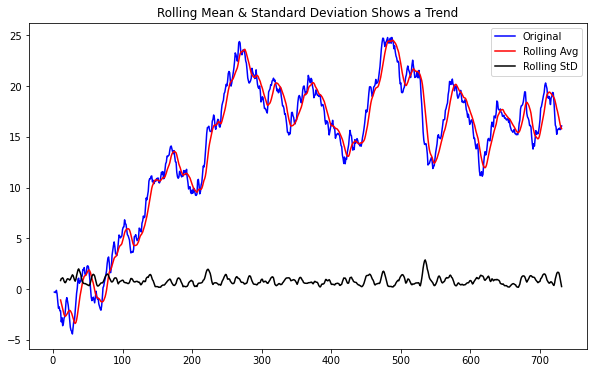

In [11]:
# Graph the Rolling Mean and Std Dev with the Original Data
orig = plt.plot(indexedTimeseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Avg')
std = plt.plot(rolstd, color='black', label='Rolling StD')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation Shows a Trend')
plt.show(block=False)

In [12]:
# stationarity check
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test: ')

dftest = adfuller(indexedTimeseries['Revenue'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No. of Observations'])

for key,value in dftest[4].items():
	dfoutput['Critical Value (%s) '%key] = value

print(dfoutput)

Results of Dickey-Fuller test: 
Test Statistic            -2.210771
p-value                    0.202360
#Lags Used                 1.000000
No. of Observations      728.000000
Critical Value (1%)       -3.439364
Critical Value (5%)       -2.865518
Critical Value (10%)      -2.568888
dtype: float64


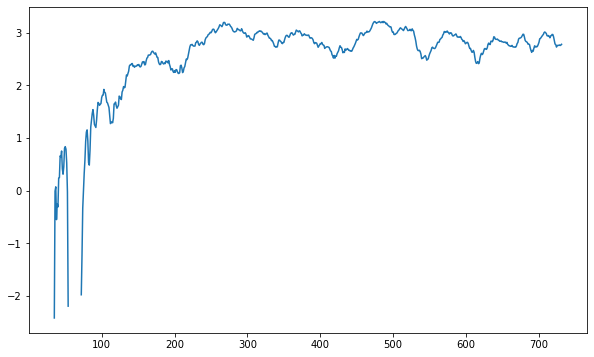

In [13]:
# Using the log of the data and Graphing it to test for stationarity
# Estimating the trend
log_indexedTimeseries=np.log(indexedTimeseries)
plt.plot(log_indexedTimeseries)  # NO stationarity when taking the log

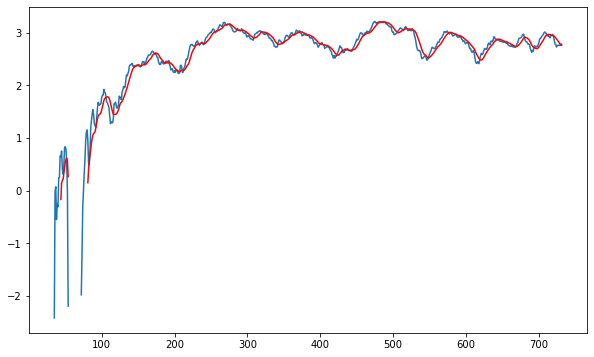

In [14]:
# Calculate the Moving Average and Graph the Moving Average
movingAvg = log_indexedTimeseries.rolling(window=10).mean()
movingSTD = log_indexedTimeseries.rolling(window=10).std()
plt.plot(log_indexedTimeseries)
plt.plot(movingAvg, color='red')  # Data still not stationary even when using the Moving Average

In [15]:
log_indexedTimeseriesMinusMovingAvg = log_indexedTimeseries - movingAvg
log_indexedTimeseriesMinusMovingAvg.head(10)                                   
#Remove NaN values
log_indexedTimeseriesMinusMovingAvg.dropna(inplace=True)
log_indexedTimeseriesMinusMovingAvg.head(10)

,Revenue
Day,
44,0.806911
45,0.603555
46,0.221715
47,0.096834
48,0.139761
49,0.383014
50,0.299444
51,0.196724
52,-0.092432


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    movingAvg = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAvg, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation Shows a Trend')
    plt.show(block=False)
    print ('Results of Dickey-Fuller test: ')
    dftest = adfuller(timeseries['Revenue'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No. of Observations'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s) '%key] = value # Critical Values should always be more than the test statistic
    print(dfoutput)

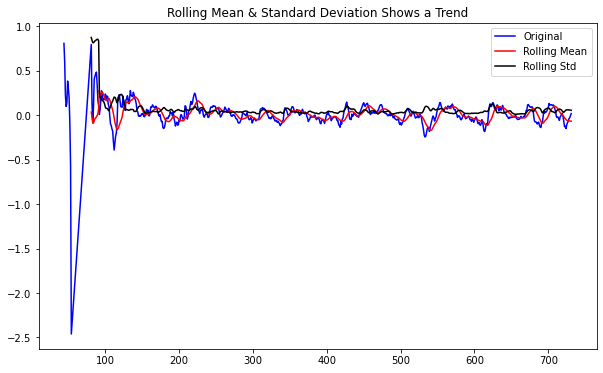

Results of Dickey-Fuller test: 
Test Statistic          -6.208629e+00
p-value                  5.577776e-08
#Lags Used               1.900000e+01
No. of Observations      6.420000e+02
Critical Value (1%)     -3.440577e+00
Critical Value (5%)     -2.866052e+00
Critical Value (10%)    -2.569173e+00
dtype: float64


In [17]:
# log - moving avg (mean)
test_stationarity(log_indexedTimeseriesMinusMovingAvg) 

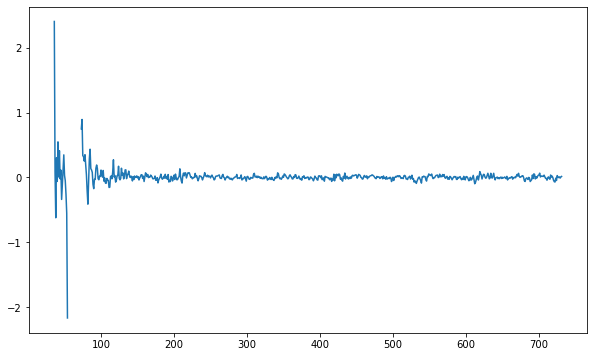

In [18]:
# log - shift(1) does yield flattened values
timeseriesLogDiffShift = log_indexedTimeseries - log_indexedTimeseries.shift()
plt.plot(timeseriesLogDiffShift)

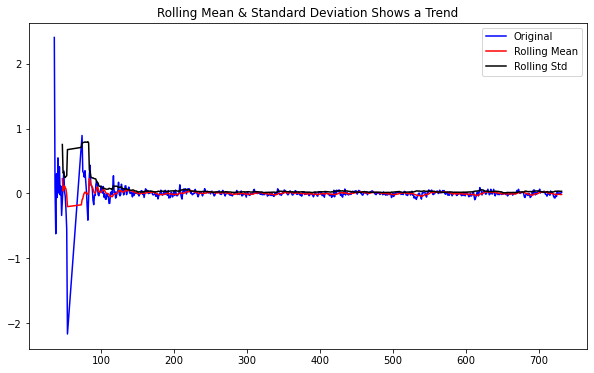

Results of Dickey-Fuller test: 
Test Statistic          -5.980257e+00
p-value                  1.845754e-07
#Lags Used               2.000000e+01
No. of Observations      6.570000e+02
Critical Value (1%)     -3.440342e+00
Critical Value (5%)     -2.865949e+00
Critical Value (10%)    -2.569118e+00
dtype: float64


In [19]:
timeseriesLogDiffShift.dropna(inplace=True)
test_stationarity(timeseriesLogDiffShift)

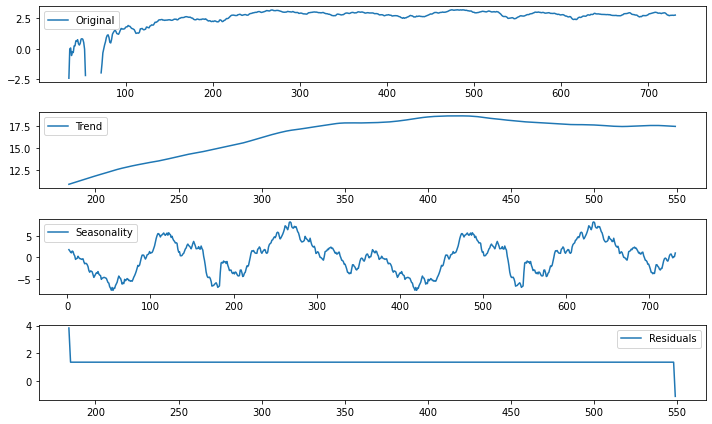

In [21]:
# Decomposing Data graph into original, trend, seasonal, residuals (noise)
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedTimeseries, period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.subplot(411)
plt.plot(log_indexedTimeseries, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

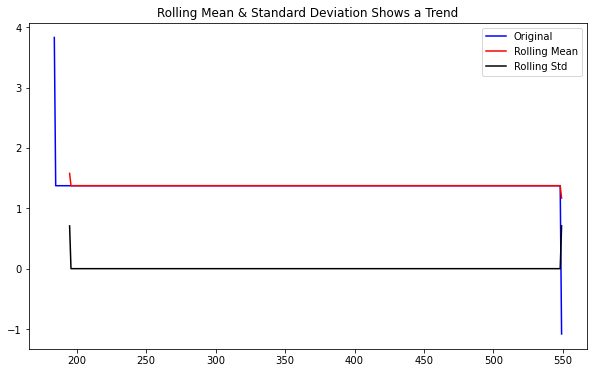

Results of Dickey-Fuller test: 


KeyError: 'Revenue'

In [22]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

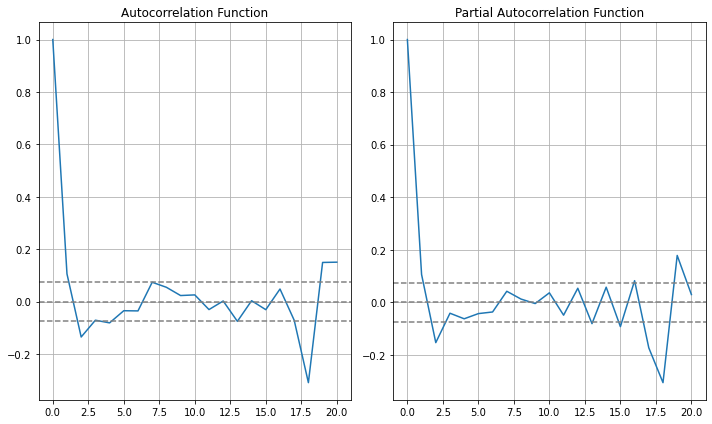

In [23]:
# Let's do the acf and pacf graphs now to determine q and p.
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(timeseriesLogDiffShift, nlags=20)
lag_pacf = pacf(timeseriesLogDiffShift, nlags=20, method='ols')

# plot acf
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(timeseriesLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(timeseriesLogDiffShift)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')
plt.grid(True)

#Plot pacf
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(timeseriesLogDiffShift)), linestyle='--', color='gray')
plt.axhline(y= 1.96/np.sqrt(len(timeseriesLogDiffShift)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()
plt.grid(True)

# See the graphs hit zero at point 1 for both.

In [24]:
!pip install pmdarima
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")
stepwise_fit=auto_arima(timeseriesLogDiffShift['Revenue'],trace=True,suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-644.823, Time=1.01 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-403.937, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-440.985, Time=0.26 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.90 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-405.673, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-645.010, Time=0.58 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.75 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.21 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.16 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-646.770, Time=0.87 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-645.569, Time=1.80 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=inf, Time=1.29 sec
 ARIMA(

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  678
Model:               SARIMAX(2, 1, 3)   Log Likelihood                 330.385
Date:                Thu, 01 Jun 2023   AIC                           -646.770
Time:                        17:32:08   BIC                           -615.147
Sample:                             0   HQIC                          -634.527
                                - 678                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0003      0.001     -0.227      0.821      -0.002       0.002
ar.L1         -1.0439      0.068    -15.405      0.000      -1.177      -0.911
ar.L2         -0.5755      0.041    -14.072      0.000      -0.656      -0.495
ma.L1          0.2476      0.071      3.489      0.000       0.109       0.387
ma.L2         -0.5409      0.079     -6.804      0.000      -0.697      -0.385
ma.L3         -0.6725      0.041    -16.391      0.000      -0.753      -0.592
sigma2         0.0220      0.001     39.228      0.000       0.021       0.023
===================================================================================
Ljung-Box (L1) (Q):                  31.50   Jarque-Bera (JB):            315113.47
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.01   Skew:                            -7.70
Prob(H) (two-sided):                  0.00   Kurtosis:                       107.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [25]:
# train and test split 80/20
from sklearn.model_selection import train_test_split
train, test = train_test_split(timeseriesLogDiffShift, test_size=0.2)
test.head()

,Revenue
Day,
620,0.057986
266,0.030091
432,0.015775
623,0.014358
264,-0.013080


In [26]:
train.head()

,Revenue
Day,
597,0.017602
595,-0.013038
82,-0.412323
93,0.143509
458,-0.026001


In [27]:
# Export cleaned datasets
test.to_csv('medicalCleanedTest.csv')
train.to_csv('medicalCleanedTrain.csv')

In [29]:
!pip install statsmodels==0.13.2 --user
from statsmodels.tsa.arima.model import ARIMA
#AR MODEL
model_A = ARIMA(timeseriesLogDiffShift['Revenue'], order=(2,1,3))
model_A = model_A.fit()
model_A.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  678
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 344.550
Date:                Thu, 01 Jun 2023   AIC                           -677.101
Time:                        17:37:34   BIC                           -649.995
Sample:                             0   HQIC                          -666.606
                                - 678                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.2991      0.011   -116.188      0.000      -1.321      -1.277
ar.L2         -0.8759      0.010    -84.960      0.000      -0.896      -0.856
ma.L1          0.4658      1.575      0.296      0.767      -2.622       3.553
ma.L2         -0.4790      2.307     -0.208      0.836      -5.000       4.042
ma.L3         -0.9868      1.550     -0.637      0.524      -4.025       2.051
sigma2         0.0209      0.033      0.637      0.524      -0.043       0.085
===================================================================================
Ljung-Box (L1) (Q):                  42.48   Jarque-Bera (JB):            239572.08
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -7.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        93.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
#AR MODEL
model_B = ARIMA(timeseriesLogDiffShift['Revenue'], order=(3,1,3))
model_B = model_B.fit()
model_B.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  678
Model:                 ARIMA(3, 1, 3)   Log Likelihood                 342.713
Date:                Thu, 01 Jun 2023   AIC                           -671.427
Time:                        17:38:50   BIC                           -639.803
Sample:                             0   HQIC                          -659.183
                                - 678                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1453      0.269      0.541      0.589      -0.381       0.672
ar.L2          0.1962      0.207      0.946      0.344      -0.210       0.603
ar.L3         -0.1585      0.121     -1.307      0.191      -0.396       0.079
ma.L1         -0.9738      0.268     -3.634      0.000      -1.499      -0.449
ma.L2         -0.4602      0.406     -1.134      0.257      -1.256       0.335
ma.L3          0.4444      0.153      2.909      0.004       0.145       0.744
sigma2         0.0212      0.000     46.139      0.000       0.020       0.022
===================================================================================
Ljung-Box (L1) (Q):                  31.54   Jarque-Bera (JB):            426952.45
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                            -8.86
Prob(H) (two-sided):                  0.00   Kurtosis:                       124.74
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [31]:
#AR MODEL
model_C = ARIMA(timeseriesLogDiffShift['Revenue'], order=(3,2,4))
model_C = model_C.fit()
model_C.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                Revenue   No. Observations:                  678
Model:                 ARIMA(3, 2, 4)   Log Likelihood                 333.812
Date:                Thu, 01 Jun 2023   AIC                           -651.624
Time:                        17:38:56   BIC                           -615.494
Sample:                             0   HQIC                          -637.635
                                - 678                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2471      0.659     -0.375      0.708      -1.539       1.045
ar.L2          0.4428      0.491      0.901      0.367      -0.520       1.406
ar.L3         -0.3099      0.204     -1.518      0.129      -0.710       0.090
ma.L1         -1.5832     53.899     -0.029      0.977    -107.224     104.057
ma.L2         -0.4089    137.340     -0.003      0.998    -269.591     268.773
ma.L3          1.5832    116.346      0.014      0.989    -226.451     229.617
ma.L4         -0.5911     32.177     -0.018      0.985     -63.657      62.475
sigma2         0.0213      1.144      0.019      0.985      -2.221       2.263
===================================================================================
Ljung-Box (L1) (Q):                  60.07   Jarque-Bera (JB):            120558.67
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             3.16
Prob(H) (two-sided):                  0.00   Kurtosis:                        68.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [32]:
# combine as a series format
predictions_ARIMA_diff = pd.Series(model_A.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Day
36    0.000000
37    2.407549
38    1.007974
39    0.741354
40    0.601768
dtype: float64


In [33]:
# transform to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Day
36    0.000000
37    2.407549
38    3.415523
39    4.156877
40    4.758644
dtype: float64


In [34]:
predictions_ARIMA_log = pd.Series(timeseriesLogDiffShift['Revenue'], index=timeseriesLogDiffShift.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Day
36    2.407549
37    2.490432
38    2.793033
39    4.459343
40    4.697035
dtype: float64

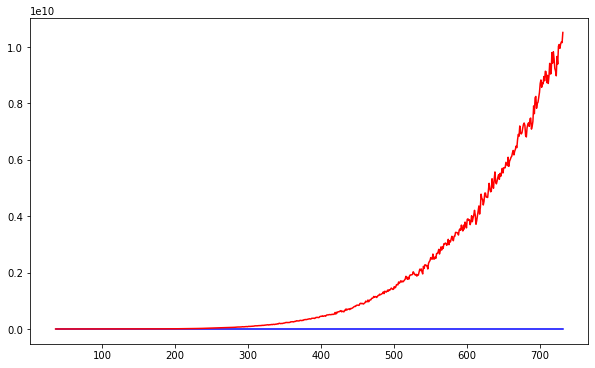

In [35]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(timeseriesLogDiffShift, color='blue')
plt.plot(predictions_ARIMA,color='red')

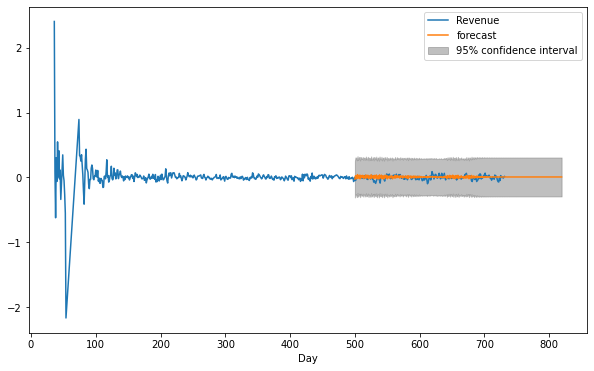

In [36]:
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

fig, ax = plt.subplots()
ax = timeseriesLogDiffShift.loc['1':].plot(ax=ax)
forecast_model_A = plot_predict(model_A, 500, 819, ax=ax) # 729 rows plus the next forecasted 90 days = 819
plt.show()

ARIMA Model Plot


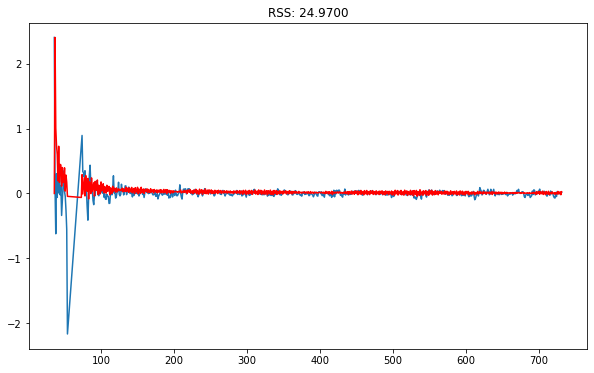

In [37]:
# error metric
plt.plot(timeseriesLogDiffShift)
plt.plot(model_A.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_A.fittedvalues-timeseriesLogDiffShift["Revenue"])**2))
print('ARIMA Model Plot')

ARIMA Model Plot


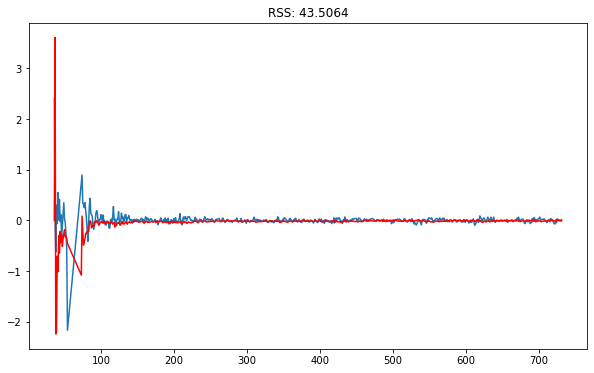

In [38]:
# error metric comparison corroborate best model found with ARIMA
plt.plot(timeseriesLogDiffShift)
plt.plot(model_C.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((model_C.fittedvalues-timeseriesLogDiffShift["Revenue"])**2))
print('ARIMA Model Plot')